In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

# Application record EDA

In [2]:
application_record = pd.read_csv(r"D:\python\application_record.csv")
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
application_record.shape

(438557, 18)

In [4]:
application_record.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [5]:
#Check for duplicate records
application_record[application_record.duplicated(subset='ID')].head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
421349,7602432,F,N,N,0,117000.0,Pensioner,Higher education,Married,House / apartment,-24708,365243,1,0,0,0,NaN,2.0
422660,7052783,M,Y,Y,2,166500.0,Working,Secondary / secondary special,Married,House / apartment,-15883,-2697,1,1,0,1,Managers,4.0
423702,7838075,F,Y,Y,0,315000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10698,-1659,1,0,0,1,NaN,1.0
424480,7053557,M,Y,Y,1,193500.0,Working,Secondary / secondary special,Married,House / apartment,-10439,-2250,1,1,0,0,Core staff,3.0
425306,7023651,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229,-1209,1,0,0,0,Accountants,1.0


In [6]:
#Gender proportion in applicants
gender_val = application_record.CODE_GENDER.value_counts(normalize = True)
gender_val

F    0.671384
M    0.328616
Name: CODE_GENDER, dtype: float64

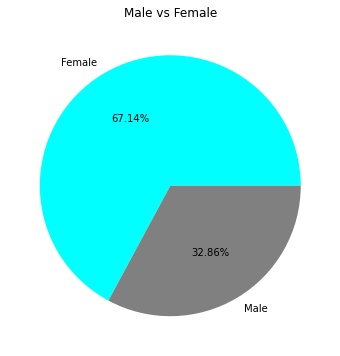

In [7]:
plt.figure(figsize= (6,6))
plt.pie(gender_val, autopct = '%1.2f%%', labels = ['Female', 'Male'], colors = ['cyan', 'grey'])
plt.title('Male vs Female', fontsize = 12)
plt.show()

Around 67.14% of the applicants are female

In [8]:
housing_val = application_record.NAME_HOUSING_TYPE.value_counts(normalize = True)
housing_val

House / apartment      0.898016
With parents           0.043499
Municipal apartment    0.032411
Rented apartment       0.013622
Office apartment       0.008943
Co-op apartment        0.003509
Name: NAME_HOUSING_TYPE, dtype: float64

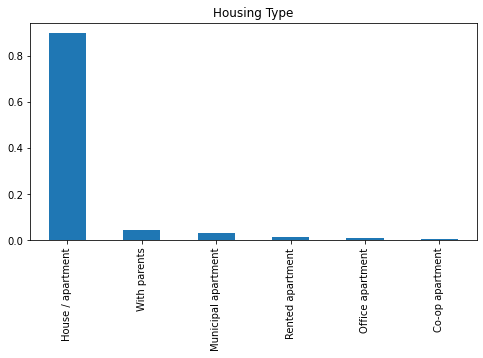

In [9]:
plt.figure(figsize= (8,4))
housing_val.plot.bar()
plt.title('Housing Type', fontsize = 12)
plt.show()

In [10]:
#House Ownership percentage
housing_ownership_count = application_record.groupby(['CODE_GENDER','NAME_HOUSING_TYPE']).agg({'ID': 'count'})
housing_ownership_count

ID
CODE_GENDER NAME_HOUSING_TYPE          
F           Co-op apartment         862
            House / apartment    267607
            Municipal apartment   10019
            Office apartment       2122
            Rented apartment       3284
            With parents          10546
M           Co-op apartment         677
            House / apartment    126224
            Municipal apartment    4195
            Office apartment       1800
            Rented apartment       2690
            With parents           8531

In [11]:
housing_ownership_percent = housing_ownership_count.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
housing_ownership_percent

ID
CODE_GENDER NAME_HOUSING_TYPE             
F           Co-op apartment       0.292759
            House / apartment    90.886768
            Municipal apartment   3.402731
            Office apartment      0.720690
            Rented apartment      1.115338
            With parents          3.581714
M           Co-op apartment       0.469757
            House / apartment    87.584393
            Municipal apartment   2.910829
            Office apartment      1.248985
            Rented apartment      1.866539
            With parents          5.919496

<Figure size 864x576 with 0 Axes>

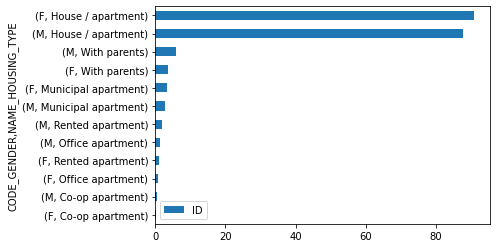

In [12]:
plt.figure(figsize= (12,8))
housing_ownership_percent.sort_values(by = 'ID').plot.barh()
plt.show()

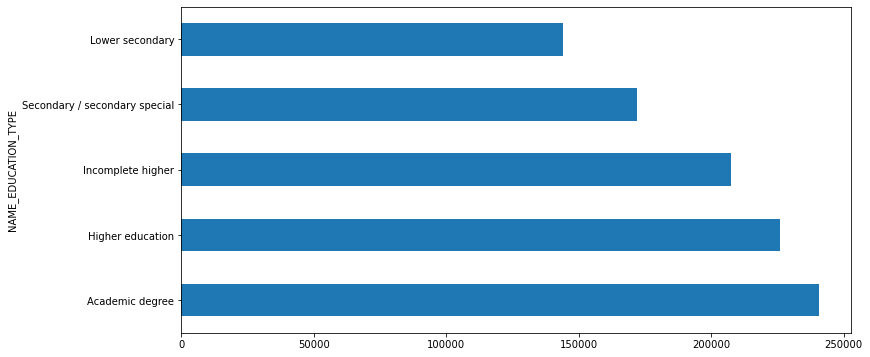

In [13]:
#Education level and income relation
plt.figure(figsize= (12,6))
application_record.groupby(["NAME_EDUCATION_TYPE"]).AMT_INCOME_TOTAL.mean().sort_values(ascending=False).plot.barh()
plt.show()

The average income increases with the education level.

In [14]:
#Mean & Median of amount income 
print('Average Annual Income:',application_record.AMT_INCOME_TOTAL.mean())
print('Median Annual Income:',application_record.AMT_INCOME_TOTAL.median())

Average Annual Income: 187524.28600950394
Median Annual Income: 160780.5


# Credit record EDA

In [15]:
credit_record = pd.read_csv(r"D:\python\credit_record.csv")
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [16]:
credit_record.shape

(1048575, 3)

In [17]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


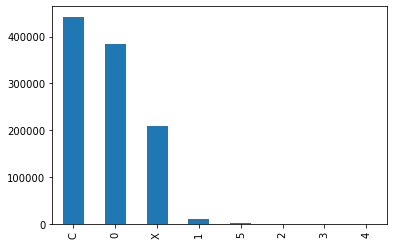

In [18]:
credit_record.STATUS.value_counts().plot.bar()
plt.show()

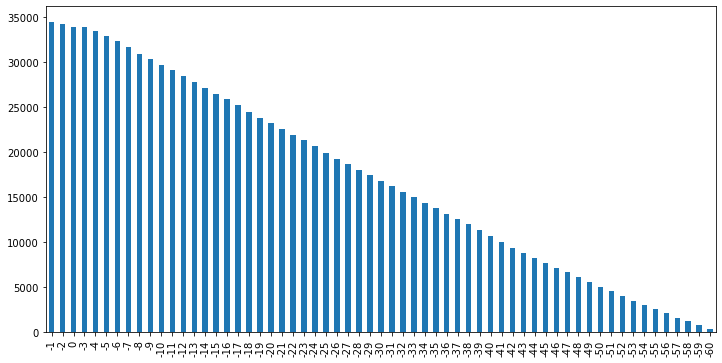

In [19]:
plt.figure(figsize= (12,6))
credit_record.MONTHS_BALANCE.value_counts().plot.bar()
plt.show()

In [20]:
#Find out for how long each customer has had a card
credit_record['MONTHS_BALANCE'] = credit_record.MONTHS_BALANCE.apply(lambda x : x*(-1))
cardholder_tenure = pd.DataFrame(credit_record.groupby('ID').agg({'MONTHS_BALANCE' : max}))
cardholder_tenure.rename(columns = {'MONTHS_BALANCE':'CUST_FOR_MONTHS'},inplace = True)
cardholder_tenure.head()

,CUST_FOR_MONTHS
ID,
5001711,3
5001712,18
5001713,21
5001714,14
5001715,59


In [21]:
#Merging application_records & credit_record to get the number of months for which the customer has had a card.
cust_data = pd.merge(application_record,cardholder_tenure,on = 'ID',how = 'inner')
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26


In [22]:
cust_data.shape

(36457, 19)

In [23]:
credit_record['STATUS'][credit_record["STATUS"] == 'C'] = -1
credit_record['STATUS'][credit_record["STATUS"] == 'X'] = -1
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,-1
1,5001711,1,0
2,5001711,2,0
3,5001711,3,0
4,5001712,0,-1


In [24]:
credit_record['STATUS'] = credit_record.STATUS.apply(lambda x : int(x))

In [25]:
credit_record.sort_values(by = 'STATUS',ascending = False,inplace = True)
credit_record.drop_duplicates(subset = ['ID'],inplace = True)
credit_record.shape

(45985, 3)

**Assuming that a person is consider a defaulter to bank if he has a payment withstanding for more than 60 days. So all the customers having STATUS >= 2 will be considered as defaulters or bad customers**

In [26]:
credit_record['target'] = credit_record.STATUS.apply(lambda x : 1 if x>=2 else 0)
credit_record.drop(['STATUS','MONTHS_BALANCE'],axis = 1,inplace = True)
credit_record.head()

,ID,target
372050,5042064,1
307952,5029028,1
723708,5097065,1
942335,5135344,1
832456,5117313,1


In [27]:
credit_record.target.value_counts()

0    45318
1      667
Name: target, dtype: int64

## Merging Credit & Application Data

In [28]:
#Merge DF to get final dataframe with all the columns
cust_data = pd.merge(cust_data, credit_record, on = "ID", how = "inner")
cust_data.shape

(36457, 20)

In [29]:
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26,0


In [30]:
#Drop duplicated values excluding ID
cust_data.drop_duplicates(subset = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'CUST_FOR_MONTHS',
       'target'],inplace = True)
cust_data.shape

(32177, 20)

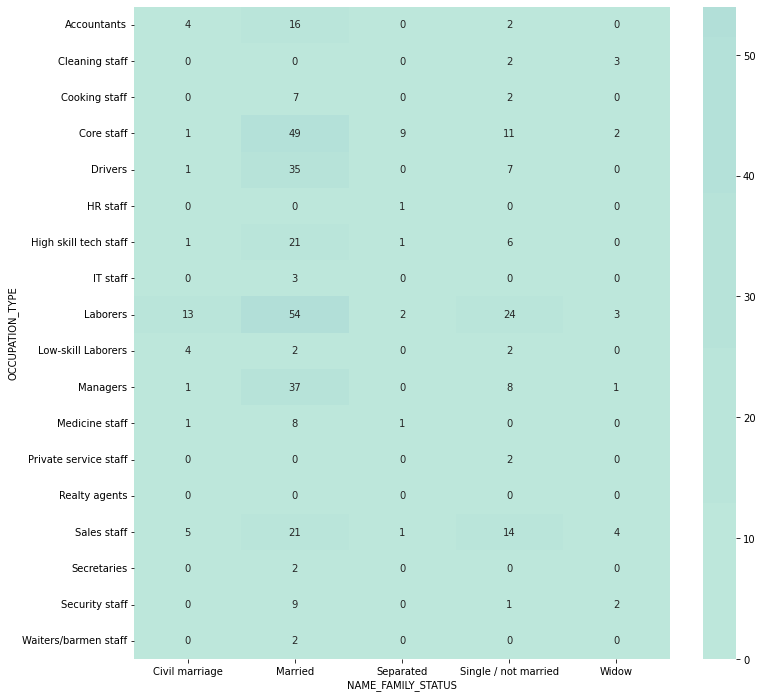

In [31]:
pvt_tbl = pd.pivot_table(data = cust_data, index = ['OCCUPATION_TYPE'], columns = ['NAME_FAMILY_STATUS'], values = 'target', aggfunc = sum,  fill_value = 0)
plt.figure(figsize = (12, 12))
hm = sns.heatmap(data = pvt_tbl, annot = True, fmt='.0f', center = 1650)
plt.show()

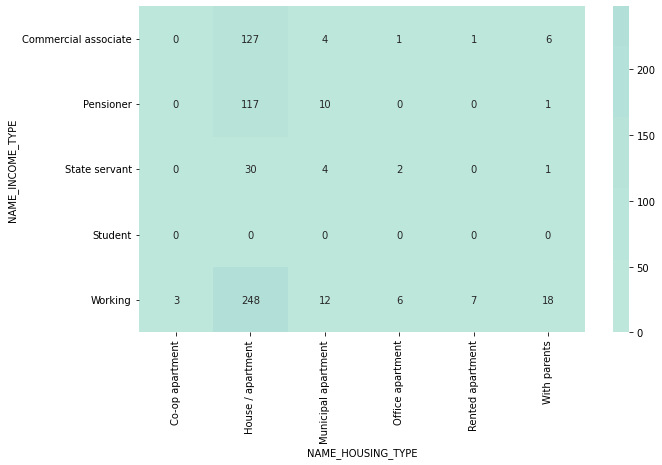

In [32]:
pvt_tbl = pd.pivot_table(data = cust_data, index = ['NAME_INCOME_TYPE'], columns = ['NAME_HOUSING_TYPE'], values = 'target', aggfunc = sum,  fill_value = 0)
plt.figure(figsize=[10,6])
hm = sns.heatmap(data = pvt_tbl, annot = True, fmt='.0f', center = 7000)
plt.show()

In [33]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32177 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   32177 non-null  int64  
 1   CODE_GENDER          32177 non-null  object 
 2   FLAG_OWN_CAR         32177 non-null  object 
 3   FLAG_OWN_REALTY      32177 non-null  object 
 4   CNT_CHILDREN         32177 non-null  int64  
 5   AMT_INCOME_TOTAL     32177 non-null  float64
 6   NAME_INCOME_TYPE     32177 non-null  object 
 7   NAME_EDUCATION_TYPE  32177 non-null  object 
 8   NAME_FAMILY_STATUS   32177 non-null  object 
 9   NAME_HOUSING_TYPE    32177 non-null  object 
 10  DAYS_BIRTH           32177 non-null  int64  
 11  DAYS_EMPLOYED        32177 non-null  int64  
 12  FLAG_MOBIL           32177 non-null  int64  
 13  FLAG_WORK_PHONE      32177 non-null  int64  
 14  FLAG_PHONE           32177 non-null  int64  
 15  FLAG_EMAIL           32177 non-null 

In [34]:
cust_data.isnull().sum()

ID                        0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        0
NAME_HOUSING_TYPE         0
DAYS_BIRTH                0
DAYS_EMPLOYED             0
FLAG_MOBIL                0
FLAG_WORK_PHONE           0
FLAG_PHONE                0
FLAG_EMAIL                0
OCCUPATION_TYPE        9980
CNT_FAM_MEMBERS           0
CUST_FOR_MONTHS           0
target                    0
dtype: int64

In [35]:
#Convert binary categorical columns to have integer value
cust_data['CODE_GENDER'] = cust_data['CODE_GENDER'].map({'M':1, 'F':0})
cust_data['FLAG_OWN_CAR'] = cust_data['FLAG_OWN_CAR'].map({'Y':1, 'N':0})
cust_data['FLAG_OWN_REALTY'] = cust_data['FLAG_OWN_REALTY'].map({'Y':1, 'N':0})

In [36]:
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15,0
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14,0
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29,0
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4,0
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26,0


In [37]:
cust_data.FLAG_MOBIL.value_counts()

1    32177
Name: FLAG_MOBIL, dtype: int64

Since all the rows have FLAG_MOBIL as 1 so there is no variation available for this column and hence it would add any value to the model. Hence it can be dropped

In [38]:
cust_data.drop('FLAG_MOBIL', axis = 1, inplace = True)

In [39]:
#CNT_FAM_MEMBERS can not be float. Convert the column to int type
cust_data['CNT_FAM_MEMBERS'] = cust_data['CNT_FAM_MEMBERS'].astype('int')

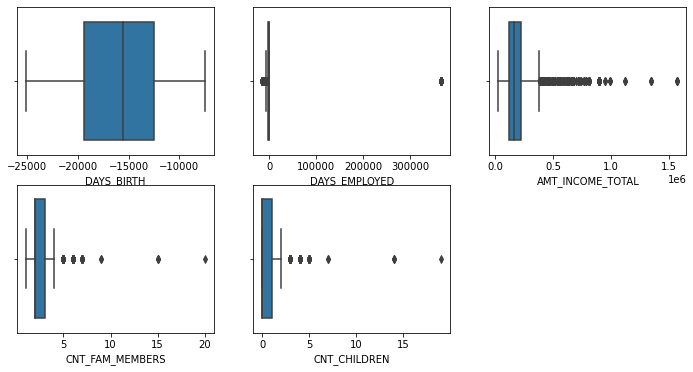

In [40]:
plt.figure(figsize = (12,6))
boxplt_col = ["DAYS_BIRTH","DAYS_EMPLOYED","AMT_INCOME_TOTAL","CNT_FAM_MEMBERS","CNT_CHILDREN"]
for i,v in enumerate(boxplt_col):
    plt.subplot(2,3,i+1)
    sns.boxplot(cust_data[v])
    

In [41]:
#Checking outliers for DAYS_EMPLOYED column
cust_data[cust_data['DAYS_EMPLOYED'] > 0]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target
7,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,NaN,1,20,0
8,5008813,0,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,NaN,1,16,0
9,5008814,0,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,NaN,1,17,0
69,5008884,0,0,1,0,315000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-20186,365243,0,0,0,NaN,1,40,0
150,5008974,0,0,1,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22319,365243,0,0,0,NaN,2,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36408,5126278,0,0,0,0,162000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21244,365243,0,0,0,NaN,2,28,1
36418,5139446,0,0,1,0,112500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21256,365243,0,1,0,NaN,1,16,1
36432,5145690,0,0,1,0,306000.0,Pensioner,Higher education,Married,House / apartment,-21590,365243,0,0,0,NaN,2,17,1
36434,5145817,0,0,1,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22011,365243,0,0,0,NaN,2,39,1


In [42]:
cust_data[(cust_data['DAYS_EMPLOYED'] > 0) & (cust_data.NAME_INCOME_TYPE == 'Pensioner')].shape

(5461, 19)

All the customers with a positive 'DAYS_EMPLOYED' are pensioners and represent a valid data.

In [43]:
#Convert the Integer columns to positive integers
cust_data['DAYS_EMPLOYED'] = cust_data['DAYS_EMPLOYED'].apply(lambda x : x*-1)
cust_data['DAYS_BIRTH'] = cust_data['DAYS_BIRTH'].apply(lambda x : x*-1)

In [44]:
#Convert DAYS to YEARS
cust_data['EMP_YEARS'] = cust_data.DAYS_EMPLOYED/365
cust_data['AGE'] = cust_data.DAYS_BIRTH/365
cust_data.drop(["DAYS_BIRTH","DAYS_EMPLOYED"],axis = 1,inplace = True)

Replacing all the EMP_YEARS for all pensioners to be -1.

In [45]:
cust_data['EMP_YEARS'] = cust_data.EMP_YEARS.apply(lambda x : -1 if x<0 else x)

In [46]:
cust_data['EMP_YEARS'] = cust_data['EMP_YEARS'].apply(lambda x: round(x))
cust_data['AGE'] = cust_data['AGE'].apply(lambda x: round(x))

In [47]:
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,EMP_YEARS,AGE
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,NaN,2,15,0,12,33
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,NaN,2,14,0,12,33
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2,29,0,3,59
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,4,0,8,52
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,26,0,8,52


In [48]:
def bad_cust_proportion(col) :
    bad_prop_cnt = cust_data.groupby([col,'target']).agg({'ID': 'count'})
    bad_prop_percent = bad_prop_cnt.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
    return bad_prop_percent

In [49]:
bad_cust_proportion('FLAG_OWN_CAR')

ID
FLAG_OWN_CAR target           
0            0       98.073748
             1        1.926252
1            0       98.252666
             1        1.747334

Proportion of bad customers for people who own a car is less than those who don't own a car

In [50]:
bad_cust_proportion('NAME_HOUSING_TYPE')

ID
NAME_HOUSING_TYPE   target           
Co-op apartment     0       97.810219
                    1        2.189781
House / apartment   0       98.182641
                    1        1.817359
Municipal apartment 0       97.044335
                    1        2.955665
Office apartment    0       96.103896
                    1        3.896104
Rented apartment    0       98.373984
                    1        1.626016
With parents        0       98.353388
                    1        1.646612

People living on rent don't have the highest proportion of bad customers. People having 'Office apartment' have the highest proportion of bad customers

In [51]:
bad_cust_proportion('NAME_FAMILY_STATUS')

ID
NAME_FAMILY_STATUS   target           
Civil marriage       0       98.282443
                     1        1.717557
Married              0       98.279375
                     1        1.720625
Separated            0       98.384491
                     1        1.615509
Single / not married 0       97.672779
                     1        2.327221
Widow                0       96.767083
                     1        3.232917

Single customers have a higher proportion of bad customers as compared to married customers

In [52]:
cust_data['OCCUPATION_TYPE'] = cust_data.OCCUPATION_TYPE.apply(lambda x : 'Others' if pd.isnull(x) else x)
cust_data.OCCUPATION_TYPE.value_counts()
df = cust_data.copy()

# Calculating WOE & IV

In [53]:
def calc_woe_iv(col) :
    df = pd.DataFrame(columns = ['values','total','good','bad','event_rate','non_event_rate','per_total_events','per_total_non_events','WOE','IV'])
    df['values'] = cust_data[col].unique()
    df.set_index('values',inplace = True)
    
    values = cust_data[col].unique()
    total_dict = dict(cust_data.groupby(col).size())
    col_target_dict = dict(cust_data.groupby([col,'target']).size())
    target_count = dict(cust_data.groupby(['target']).size())
    
    for value in values :
        df.loc[value]['total'] = total_dict[value]
        if (value,1) in col_target_dict:
            df.loc[value]['bad'] = col_target_dict[(value,1)]
        else :
            df.loc[value]['bad'] = 0
        
        if (value,0) in col_target_dict:
            df.loc[value]['good'] = col_target_dict[(value,0)]
        else :
            df.loc[value]['good'] = 0
            
        if df.loc[value]['bad'] == 0 :
            df = df.drop([value])
        
    df['event_rate'] = df['bad']/df['total']
    df['non_event_rate'] = df['good']/df['total']
    
    df['per_total_events'] = df['bad']/target_count[1]
    df['per_total_non_events'] = df['good']/target_count[0]
    
    df['WOE'] = np.log(df.per_total_non_events.astype('float64')/df.per_total_events.astype('float64'))
    df['IV'] = (df['per_total_non_events'] - df['per_total_events']) * df['WOE']
    
    return df

In [54]:
iv_values = pd.DataFrame(columns = ['col_name','iv_value'])

In [55]:
iv_values['col_name'] = cust_data.columns
iv_values.set_index(['col_name'],inplace = True)
iv_values.drop(['ID','target'],inplace = True)
iv_values

,iv_value
col_name,
CODE_GENDER,NaN
FLAG_OWN_CAR,NaN
FLAG_OWN_REALTY,NaN
CNT_CHILDREN,NaN
AMT_INCOME_TOTAL,NaN
NAME_INCOME_TYPE,NaN
NAME_EDUCATION_TYPE,NaN
NAME_FAMILY_STATUS,NaN
NAME_HOUSING_TYPE,NaN


In [56]:
# dataframe of WoE values
df_woe = pd.DataFrame()

## Binary Variable

### CODE_GENDER

In [57]:
CODE_GENDER_df = calc_woe_iv('CODE_GENDER')
iv_values.loc['CODE_GENDER'] = CODE_GENDER_df.IV.sum()
print(iv_values.loc['CODE_GENDER'])
d= dict(zip(CODE_GENDER_df.index, CODE_GENDER_df.WOE))
df_woe['CODE_GENDER'] = cust_data['CODE_GENDER'].map(d)

CODE_GENDER_df

iv_value    0.011588
Name: CODE_GENDER, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
1,10642,10414,228,0.021425,0.978575,0.381271,0.329776,-0.145096,0.007472
0,21535,21165,370,0.017181,0.982819,0.618729,0.670224,0.079944,0.004117


### FLAG_OWN_CAR

In [58]:
FLAG_OWN_CAR_df = calc_woe_iv('FLAG_OWN_CAR')
iv_values.loc['FLAG_OWN_CAR'] = FLAG_OWN_CAR_df.IV.sum()
print(iv_values.loc['FLAG_OWN_CAR'])
d= dict(zip(FLAG_OWN_CAR_df.index, FLAG_OWN_CAR_df.WOE))
df_woe['FLAG_OWN_CAR'] = cust_data['FLAG_OWN_CAR'].map(d)
FLAG_OWN_CAR_df

iv_value    0.002292
Name: FLAG_OWN_CAR, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
1,12190,11977,213,0.017473,0.982527,0.356187,0.379271,0.062794,0.00145
0,19987,19602,385,0.019263,0.980737,0.643813,0.620729,-0.036513,0.000843


### FLAG_OWN_REALTY

In [59]:
FLAG_OWN_REALTY_df = calc_woe_iv('FLAG_OWN_REALTY')
iv_values.loc['FLAG_OWN_REALTY'] = FLAG_OWN_REALTY_df.IV.sum()
print(iv_values.loc['FLAG_OWN_REALTY'])
d= dict(zip(FLAG_OWN_REALTY_df.index, FLAG_OWN_REALTY_df.WOE))
df_woe['FLAG_OWN_REALTY'] = cust_data['FLAG_OWN_REALTY'].map(d)
FLAG_OWN_REALTY_df

iv_value    0.030487
Name: FLAG_OWN_REALTY, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
1,21597,21245,352,0.016299,0.983701,0.588629,0.672757,0.133589,0.011239
0,10580,10334,246,0.023251,0.976749,0.411371,0.327243,-0.228794,0.019248


### FLAG_WORK_PHONE

In [60]:
FLAG_WORK_PHONE_df = calc_woe_iv('FLAG_WORK_PHONE')
iv_values.loc['FLAG_WORK_PHONE'] = FLAG_WORK_PHONE_df.IV.sum()
print(iv_values.loc['FLAG_WORK_PHONE'])
d= dict(zip(FLAG_WORK_PHONE_df.index, FLAG_WORK_PHONE_df.WOE))
df_woe['FLAG_WORK_PHONE'] = cust_data['FLAG_WORK_PHONE'].map(d)
FLAG_WORK_PHONE_df

iv_value    0.002058
Name: FLAG_WORK_PHONE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
1,7249,7103,146,0.020141,0.979859,0.244147,0.224928,-0.081991,0.001576
0,24928,24476,452,0.018132,0.981868,0.755853,0.775072,0.025109,0.000483


### FLAG_PHONE

In [61]:
FLAG_PHONE_df = calc_woe_iv('FLAG_PHONE')
iv_values.loc['FLAG_PHONE'] = FLAG_PHONE_df.IV.sum()
print(iv_values.loc['FLAG_PHONE'])
d= dict(zip(FLAG_PHONE_df.index, FLAG_PHONE_df.WOE))
df_woe['FLAG_PHONE'] = cust_data['FLAG_PHONE'].map(d)
FLAG_PHONE_df

iv_value    0.000168
Name: FLAG_PHONE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,22679,22261,418,0.018431,0.981569,0.698997,0.70493,0.008453,0.00005
1,9498,9318,180,0.018951,0.981049,0.301003,0.29507,-0.019910,0.000118


### FLAG_EMAIL

In [62]:
FLAG_EMAIL_df = calc_woe_iv('FLAG_EMAIL')
iv_values.loc['FLAG_EMAIL'] = FLAG_EMAIL_df.IV.sum()
print(iv_values.loc['FLAG_EMAIL'])
d= dict(zip(FLAG_EMAIL_df.index, FLAG_EMAIL_df.WOE))
df_woe['FLAG_EMAIL'] = cust_data['FLAG_EMAIL'].map(d)
FLAG_EMAIL_df

iv_value    0.00053
Name: FLAG_EMAIL, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,29282,28734,548,0.018715,0.981285,0.916388,0.909908,-0.007096,0.000046
1,2895,2845,50,0.017271,0.982729,0.083612,0.090092,0.074638,0.000484


## Categorical Variables

### NAME_INCOME_TYPE

In [63]:
NAME_INCOME_TYPE_df = calc_woe_iv('NAME_INCOME_TYPE')
iv_values.loc['NAME_INCOME_TYPE'] = NAME_INCOME_TYPE_df.IV.sum()
print(iv_values.loc['NAME_INCOME_TYPE'])
d= dict(zip(NAME_INCOME_TYPE_df.index, NAME_INCOME_TYPE_df.WOE))
df_woe['NAME_INCOME_TYPE'] = cust_data['NAME_INCOME_TYPE'].map(d)
NAME_INCOME_TYPE_df

iv_value    0.017319
Name: NAME_INCOME_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Working,16564,16270,294,0.017749,0.982251,0.491639,0.515216,0.046842,0.001104
Commercial associate,7492,7353,139,0.018553,0.981447,0.232441,0.232845,0.001733,0.000001
Pensioner,5478,5350,128,0.023366,0.976634,0.214047,0.169416,-0.233835,0.010436
State servant,2633,2596,37,0.014052,0.985948,0.061873,0.082207,0.284152,0.005778


###  NAME_EDUCATION_TYPE

In [64]:
NAME_EDUCATION_TYPE_df = calc_woe_iv('NAME_EDUCATION_TYPE')
iv_values.loc['NAME_EDUCATION_TYPE'] = NAME_EDUCATION_TYPE_df.IV.sum()
print(iv_values.loc['NAME_EDUCATION_TYPE'])
d= dict(zip(NAME_EDUCATION_TYPE_df.index, NAME_EDUCATION_TYPE_df.WOE))
df_woe['NAME_EDUCATION_TYPE'] = cust_data['NAME_EDUCATION_TYPE'].map(d)
NAME_EDUCATION_TYPE_df

iv_value    0.008581
Name: NAME_EDUCATION_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Higher education,8670,8503,167,0.019262,0.980738,0.279264,0.269261,-0.036476,0.000365
Secondary / secondary special,21895,21505,390,0.017812,0.982188,0.652174,0.680991,0.043237,0.001246
Incomplete higher,1251,1220,31,0.02478,0.97522,0.051839,0.038633,-0.294038,0.003883
Lower secondary,336,326,10,0.029762,0.970238,0.016722,0.010323,-0.482345,0.003087


### NAME_FAMILY_STATUS

In [65]:
NAME_FAMILY_STATUS_df = calc_woe_iv('NAME_FAMILY_STATUS')
iv_values.loc['NAME_FAMILY_STATUS'] = NAME_FAMILY_STATUS_df.IV.sum()
print(iv_values.loc['NAME_FAMILY_STATUS'])
d= dict(zip(NAME_FAMILY_STATUS_df.index, NAME_FAMILY_STATUS_df.WOE))
df_woe['NAME_FAMILY_STATUS'] = cust_data['NAME_FAMILY_STATUS'].map(d)
NAME_FAMILY_STATUS_df

iv_value    0.031572
Name: NAME_FAMILY_STATUS, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Civil marriage,2620,2575,45,0.017176,0.982824,0.075251,0.081542,0.080285,0.000505
Married,22085,21705,380,0.017206,0.982794,0.635452,0.687324,0.078470,0.00407
Single / not married,4254,4155,99,0.023272,0.976728,0.165552,0.131575,-0.229709,0.007805
Separated,1857,1827,30,0.016155,0.983845,0.050167,0.057855,0.142576,0.001096
Widow,1361,1317,44,0.032329,0.967671,0.073579,0.041705,-0.567735,0.018096


### NAME_HOUSING_TYPE

In [66]:
NAME_HOUSING_TYPE_df = calc_woe_iv('NAME_HOUSING_TYPE')
iv_values.loc['NAME_HOUSING_TYPE'] = NAME_HOUSING_TYPE_df.IV.sum()
print(iv_values.loc['NAME_HOUSING_TYPE'])
d= dict(zip(NAME_HOUSING_TYPE_df.index, NAME_HOUSING_TYPE_df.WOE))
df_woe['NAME_HOUSING_TYPE'] = cust_data['NAME_HOUSING_TYPE'].map(d)
NAME_HOUSING_TYPE_df

iv_value    0.016678
Name: NAME_HOUSING_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Rented apartment,492,484,8,0.01626,0.98374,0.013378,0.015327,0.135986,0.000265
House / apartment,28723,28201,522,0.018174,0.981826,0.87291,0.89303,0.022788,0.000459
Municipal apartment,1015,985,30,0.029557,0.970443,0.050167,0.031192,-0.475213,0.009017
With parents,1579,1553,26,0.016466,0.983534,0.043478,0.049178,0.123190,0.000702
Co-op apartment,137,134,3,0.021898,0.978102,0.005017,0.004243,-0.167429,0.000129
Office apartment,231,222,9,0.038961,0.961039,0.01505,0.00703,-0.761204,0.006105


### OCCUPATION_TYPE

In [67]:
OCCUPATION_TYPE_df = calc_woe_iv('OCCUPATION_TYPE')
iv_values.loc['OCCUPATION_TYPE'] = OCCUPATION_TYPE_df.IV.sum()
print(iv_values.loc['OCCUPATION_TYPE'])
d= dict(zip(OCCUPATION_TYPE_df.index, OCCUPATION_TYPE_df.WOE))
df_woe['OCCUPATION_TYPE'] = cust_data['OCCUPATION_TYPE'].map(d)

OCCUPATION_TYPE_df

iv_value    0.053347
Name: OCCUPATION_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Others,9980,9790,190,0.019038,0.980962,0.317726,0.310016,-0.024564,0.000189
Security staff,530,518,12,0.022642,0.977358,0.020067,0.016403,-0.201588,0.000739
Sales staff,3062,3017,45,0.014696,0.985304,0.075251,0.095538,0.238699,0.004843
Accountants,1082,1060,22,0.020333,0.979667,0.036789,0.033567,-0.091675,0.000295
Laborers,5460,5364,96,0.017582,0.982418,0.160535,0.16986,0.056460,0.000526
Managers,2629,2582,47,0.017878,0.982122,0.078595,0.081763,0.039515,0.000125
Drivers,1931,1888,43,0.022268,0.977732,0.071906,0.059787,-0.184584,0.002237
Core staff,3185,3113,72,0.022606,0.977394,0.120401,0.098578,-0.199981,0.004364
High skill tech staff,1229,1200,29,0.023596,0.976404,0.048495,0.038,-0.243876,0.002559


## Continuous Variables

In [68]:
cust_data.describe()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,EMP_YEARS,AGE
count,3.217700e+04,32177.000000,32177.000000,32177.000000,32177.000000,3.217700e+04,32177.000000,32177.000000,32177.000000,32177.000000,32177.000000,32177.000000,32177.000000,32177.000000
mean,5.078181e+06,0.330733,0.378842,0.671194,0.431395,1.858457e+05,0.225285,0.295180,0.089971,2.199521,26.070268,0.018585,5.847158,43.781148
std,4.181678e+04,0.470484,0.485106,0.469787,0.745757,1.007217e+05,0.417776,0.456131,0.286145,0.914533,16.465296,0.135055,6.656300,11.556825
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,2.700000e+04,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,21.000000
25%,5.041913e+06,0.000000,0.000000,0.000000,0.000000,1.215000e+05,0.000000,0.000000,0.000000,2.000000,12.000000,0.000000,1.000000,34.000000
50%,5.074710e+06,0.000000,0.000000,1.000000,0.000000,1.575000e+05,0.000000,0.000000,0.000000,2.000000,24.000000,0.000000,4.000000,43.000000
75%,5.114631e+06,1.000000,1.000000,1.000000,1.000000,2.250000e+05,0.000000,1.000000,0.000000,3.000000,39.000000,0.000000,9.000000,53.000000
max,5.150487e+06,1.000000,1.000000,1.000000,19.000000,1.575000e+06,1.000000,1.000000,1.000000,20.000000,60.000000,1.000000,43.000000,69.000000


### CNT_CHILDREN

Since all the bins should have atleast 5% of the total observations, therefore dividing 'CNT_CHILDREN' into [0,1,1+] bins

In [69]:
cust_data['cnt_child_category'] = cust_data.CNT_CHILDREN.apply(lambda x : '1+' if x>= 2 else str(x))

In [70]:
CNT_CHILDREN_df = calc_woe_iv('cnt_child_category')
iv_values.loc['CNT_CHILDREN'] = CNT_CHILDREN_df.IV.sum()
print(iv_values.loc['CNT_CHILDREN'])
d= dict(zip(CNT_CHILDREN_df.index, CNT_CHILDREN_df.WOE))
df_woe['CNT_CHILDREN'] = cust_data['cnt_child_category'].map(d)
CNT_CHILDREN_df

iv_value    0.000712
Name: CNT_CHILDREN, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,22233,21813,420,0.018891,0.981109,0.702341,0.690744,-0.016650,0.000193
1,6609,6492,117,0.017703,0.982297,0.195652,0.20558,0.049495,0.000491
1+,3335,3274,61,0.018291,0.981709,0.102007,0.103676,0.016237,0.000027


###  AMT_INCOME_TOTAL

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

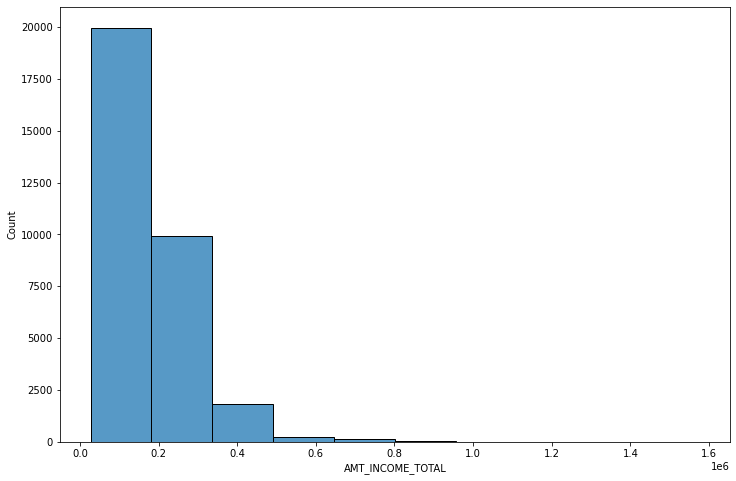

In [71]:
plt.figure(figsize = (12,8))
sns.histplot(cust_data['AMT_INCOME_TOTAL'], bins=10)

In [72]:
# bin = pd.qcut(cust_data['AMT_INCOME_TOTAL'], q = 10, duplicates = 'drop')
# list = []
# for i in bin.values.unique():
#     list.append(i.left)
# bins = sorted(list)
# 
# bins = [str(i) for i in bins]

In [73]:
bins = [0, 70000, 100000, 150000, 200000, 250000, 300000, 350000, 1600000]
labels = ['70000', '100000', '150000', '200000', '250000', '300000', '350000', '1600000']
cust_data['income_bin'] = pd.cut(cust_data['AMT_INCOME_TOTAL'], bins = bins, labels = labels)
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,EMP_YEARS,AGE,cnt_child_category,income_bin
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,0,Others,2,15,0,12,33,0,1600000
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,0,Others,2,14,0,12,33,0,1600000
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,Security staff,2,29,0,3,59,0,150000
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,1,Sales staff,1,4,0,8,52,0,300000
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,1,Sales staff,1,26,0,8,52,0,300000


In [74]:
cust_data.income_bin.value_counts()

150000     9059
200000     6832
250000     6019
100000     3113
300000     2407
1600000    2028
70000      1411
350000     1308
Name: income_bin, dtype: int64

In [75]:
AMT_INCOME_TOTAL_df = calc_woe_iv('income_bin')
iv_values.loc['AMT_INCOME_TOTAL'] = AMT_INCOME_TOTAL_df.IV.sum()
print(iv_values.loc['AMT_INCOME_TOTAL'])
AMT_INCOME_TOTAL_df.sort_values(by = 'WOE',inplace = True)
d= dict(zip(AMT_INCOME_TOTAL_df.index, AMT_INCOME_TOTAL_df.WOE))
df_woe['AMT_INCOME_TOTAL'] = cust_data['income_bin'].map(d)
AMT_INCOME_TOTAL_df

iv_value    0.010276
Name: AMT_INCOME_TOTAL, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
100000,3113,3045,68,0.021844,0.978156,0.113712,0.096425,-0.164908,0.002851
350000,1308,1281,27,0.020642,0.979358,0.045151,0.040565,-0.107097,0.000491
300000,2407,2358,49,0.020357,0.979643,0.08194,0.07467,-0.092908,0.000675
250000,6019,5904,115,0.019106,0.980894,0.192308,0.18696,-0.028204,0.000151
150000,9059,8890,169,0.018655,0.981345,0.282609,0.281516,-0.003873,0.000004
200000,6832,6715,117,0.017125,0.982875,0.195652,0.212641,0.083268,0.001415
1600000,2028,1994,34,0.016765,0.983235,0.056856,0.063143,0.104881,0.000659
70000,1411,1392,19,0.013466,0.986534,0.031773,0.04408,0.327401,0.004029


### CNT_FAM_MEMBERS

In [76]:
cust_data.CNT_FAM_MEMBERS.value_counts()

2     17166
1      6168
3      5665
4      2748
5       357
6        50
7        17
15        3
9         2
20        1
Name: CNT_FAM_MEMBERS, dtype: int64

In [77]:
cust_data['cnt_family_bin'] = cust_data.CNT_FAM_MEMBERS.apply(lambda x : '3+' if x>= 4 else str(x))

In [78]:
CNT_FAM_MEMBERS_df = calc_woe_iv('cnt_family_bin')
iv_values.loc['CNT_FAM_MEMBERS'] = CNT_FAM_MEMBERS_df.IV.sum()
print(iv_values.loc['CNT_FAM_MEMBERS'])
CNT_FAM_MEMBERS_df.sort_values(by = 'WOE',inplace = True)
d= dict(zip(CNT_FAM_MEMBERS_df.index, CNT_FAM_MEMBERS_df.WOE))
df_woe['CNT_FAM_MEMBERS'] = cust_data['cnt_family_bin'].map(d)
CNT_FAM_MEMBERS_df

iv_value    0.008039
Name: CNT_FAM_MEMBERS, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
1,6168,6032,136,0.022049,0.977951,0.227425,0.191013,-0.174478,0.006353
3,5665,5564,101,0.017829,0.982171,0.168896,0.176193,0.042295,0.000309
2,17166,16861,305,0.017768,0.982232,0.510033,0.533931,0.045790,0.001094
3+,3178,3122,56,0.017621,0.982379,0.093645,0.098863,0.054221,0.000283


### CUST_FOR_MONTHS

In [79]:
bins = [-1, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60]
labels = ['0.5','1','1.5','2','2.5','3','3.5','4','4.5','5']
cust_data['months_bin'] = pd.cut(cust_data['CUST_FOR_MONTHS'], bins = bins,labels = labels)
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,EMP_YEARS,AGE,cnt_child_category,income_bin,cnt_family_bin,months_bin
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,Others,2,15,0,12,33,0,1600000,2,1.5
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,Others,2,14,0,12,33,0,1600000,2,1.5
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,Security staff,2,29,0,3,59,0,150000,2,2.5
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,Sales staff,1,4,0,8,52,0,300000,1,0.5
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,Sales staff,1,26,0,8,52,0,300000,1,2.5


In [80]:
cust_data.months_bin.value_counts()

1      4279
0.5    4200
1.5    4096
2      3639
2.5    3453
3.5    3079
3      3049
4      2433
4.5    2214
5      1735
Name: months_bin, dtype: int64

In [81]:
CUST_FOR_MONTHS_df = calc_woe_iv('months_bin')
iv_values.loc['CUST_FOR_MONTHS'] = CUST_FOR_MONTHS_df.IV.sum()
print(iv_values.loc['CUST_FOR_MONTHS'])
CUST_FOR_MONTHS_df.sort_values(by = 'WOE',inplace = True)
d= dict(zip(CUST_FOR_MONTHS_df.index, CUST_FOR_MONTHS_df.WOE))
df_woe['CUST_FOR_MONTHS'] = cust_data['months_bin'].map(d)
CUST_FOR_MONTHS_df

iv_value    0.290192
Name: CUST_FOR_MONTHS, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
5,1735,1669,66,0.03804,0.96196,0.110368,0.052852,-0.736332,0.042351
3.5,3079,2990,89,0.028905,0.971095,0.148829,0.094683,-0.452265,0.024488
4,2433,2364,69,0.02836,0.97164,0.115385,0.07486,-0.432653,0.017533
4.5,2214,2154,60,0.0271,0.9729,0.100334,0.06821,-0.385920,0.012397
3,3049,2989,60,0.019679,0.980321,0.100334,0.094652,-0.058307,0.000331
2.5,3453,3387,66,0.019114,0.980886,0.110368,0.107255,-0.028612,0.000089
2,3639,3584,55,0.015114,0.984886,0.091973,0.113493,0.210245,0.004524
1.5,4096,4037,59,0.014404,0.985596,0.098662,0.127838,0.259063,0.007558
1,4279,4221,58,0.013555,0.986445,0.09699,0.133665,0.320727,0.011763


### EMP_YEARS

In [82]:
bins = [-2, -1,  5, 10, 15,  20, 50]
labels = ['retired','5','10','15','20','20+']
cust_data['emp_years_bin'] = pd.cut(cust_data['EMP_YEARS'], bins = bins, labels = labels)
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,EMP_YEARS,AGE,cnt_child_category,income_bin,cnt_family_bin,months_bin,emp_years_bin
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,2,15,0,12,33,0,1600000,2,1.5,15
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,2,14,0,12,33,0,1600000,2,1.5,15
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,2,29,0,3,59,0,150000,2,2.5,5
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,4,0,8,52,0,300000,1,0.5,10
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,26,0,8,52,0,300000,1,2.5,10


In [83]:
cust_data.emp_years_bin.value_counts()

5          13473
10          7494
retired     5461
15          3103
20+         1364
20          1282
Name: emp_years_bin, dtype: int64

In [84]:
EMP_YEARS_df = calc_woe_iv('emp_years_bin')
iv_values.loc['EMP_YEARS'] = EMP_YEARS_df.IV.sum()
print(iv_values.loc['EMP_YEARS'])
EMP_YEARS_df.sort_values(by = 'WOE',inplace = True)
d= dict(zip(EMP_YEARS_df.index, EMP_YEARS_df.WOE))
df_woe['EMP_YEARS'] = cust_data['emp_years_bin'].map(d)
EMP_YEARS_df

iv_value    0.02763
Name: EMP_YEARS, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
5,13473,13189,284,0.021079,0.978921,0.474916,0.417651,-0.128493,0.007358
retired,5461,5350,111,0.020326,0.979674,0.185619,0.169416,-0.091335,0.00148
10,7494,7370,124,0.016547,0.983453,0.207358,0.233383,0.118235,0.003077
15,3103,3058,45,0.014502,0.985498,0.075251,0.096837,0.252197,0.005444
20,1282,1264,18,0.014041,0.985959,0.0301,0.040027,0.285008,0.002829
20+,1364,1348,16,0.01173,0.98827,0.026756,0.042687,0.467132,0.007442


### AGE

In [85]:
bins = [19, 27, 30, 35, 40, 45, 50, 55, 62, 70]
labels = ['27','30','35','40','45','50','55','62','70']
cust_data['age_bin'] = pd.cut(cust_data['AGE'], bins = bins,labels = labels)
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,CUST_FOR_MONTHS,target,EMP_YEARS,AGE,cnt_child_category,income_bin,cnt_family_bin,months_bin,emp_years_bin,age_bin
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,15,0,12,33,0,1600000,2,1.5,15,35
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,14,0,12,33,0,1600000,2,1.5,15,35
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,29,0,3,59,0,150000,2,2.5,5,62
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,4,0,8,52,0,300000,1,0.5,10,55
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,26,0,8,52,0,300000,1,2.5,10,55


In [86]:
cust_data.age_bin.value_counts()

40    4756
62    4612
35    4397
45    4351
50    3641
55    3579
30    2836
27    2084
70    1921
Name: age_bin, dtype: int64

In [87]:
AGE_df = calc_woe_iv('age_bin')
iv_values.loc['AGE'] = AGE_df.IV.sum()
print(iv_values.loc['AGE'])
AGE_df.sort_values(by = 'WOE',inplace = True)
d= dict(zip(AGE_df.index, AGE_df.WOE))
df_woe['AGE'] = cust_data['age_bin'].map(d)
AGE_df

iv_value    0.025859
Name: AGE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
30,2836,2763,73,0.02574,0.97426,0.122074,0.087495,-0.333044,0.011516
55,3579,3499,80,0.022353,0.977647,0.133779,0.110801,-0.188451,0.00433
50,3641,3571,70,0.019225,0.980775,0.117057,0.113081,-0.034551,0.000137
35,4397,4316,81,0.018422,0.981578,0.135452,0.136673,0.008978,0.000011
62,4612,4528,84,0.018213,0.981787,0.140468,0.143386,0.020562,0.00006
27,2084,2047,37,0.017754,0.982246,0.061873,0.064822,0.046556,0.000137
70,1921,1889,32,0.016658,0.983342,0.053512,0.059818,0.111410,0.000703
45,4351,4283,68,0.015629,0.984371,0.113712,0.135628,0.176244,0.003863
40,4756,4683,73,0.015349,0.984651,0.122074,0.148295,0.194578,0.005102


In [88]:
iv_values.sort_values(by = 'iv_value',ascending=False,inplace = True)
iv_values

,iv_value
col_name,
CUST_FOR_MONTHS,0.290192
OCCUPATION_TYPE,0.053347
NAME_FAMILY_STATUS,0.031572
FLAG_OWN_REALTY,0.030487
EMP_YEARS,0.02763
AGE,0.025859
NAME_INCOME_TYPE,0.017319
NAME_HOUSING_TYPE,0.016678
CODE_GENDER,0.011588


In [89]:
imp_cols = iv_values.sort_values('iv_value', ascending= False).head(8).index

## Modeling using WoE

In [90]:
df_woe.reset_index(drop = True, inplace = True)
cust_data.reset_index(drop = True, inplace = True)

In [91]:
df_woe['target'] = cust_data['target']

In [92]:
df_woe.index = cust_data['ID']

In [93]:
df_woe.dropna(inplace = True)

In [94]:
df_woe.dtypes

CODE_GENDER             float64
FLAG_OWN_CAR            float64
FLAG_OWN_REALTY         float64
FLAG_WORK_PHONE         float64
FLAG_PHONE              float64
FLAG_EMAIL              float64
NAME_INCOME_TYPE        float64
NAME_EDUCATION_TYPE     float64
NAME_FAMILY_STATUS      float64
NAME_HOUSING_TYPE       float64
OCCUPATION_TYPE         float64
CNT_CHILDREN            float64
AMT_INCOME_TOTAL       category
CNT_FAM_MEMBERS         float64
CUST_FOR_MONTHS        category
EMP_YEARS              category
AGE                    category
target                    int64
dtype: object

In [95]:
df_woe['AMT_INCOME_TOTAL'] = df_woe['AMT_INCOME_TOTAL'].astype('float64')
df_woe['CUST_FOR_MONTHS'] = df_woe['CUST_FOR_MONTHS'].astype('float64')
df_woe['EMP_YEARS'] = df_woe['EMP_YEARS'].astype('float64')
df_woe['AGE'] = df_woe['AGE'].astype('float64')

In [96]:
df_woe

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,EMP_YEARS,AGE,target
ID,,,,,,,,,,,,,,,,,,
5008804,-0.145096,0.062794,0.133589,-0.081991,0.008453,-0.007096,0.046842,-0.036476,0.080285,0.135986,-0.024564,-0.01665,0.104881,0.045790,0.259063,0.252197,0.008978,0
5008805,-0.145096,0.062794,0.133589,-0.081991,0.008453,-0.007096,0.046842,-0.036476,0.080285,0.135986,-0.024564,-0.01665,0.104881,0.045790,0.259063,0.252197,0.008978,0
5008806,-0.145096,0.062794,0.133589,0.025109,0.008453,-0.007096,0.046842,0.043237,0.078470,0.022788,-0.201588,-0.01665,-0.003873,0.045790,-0.028612,-0.128493,0.020562,0
5008808,0.079944,-0.036513,0.133589,0.025109,-0.019910,0.074638,0.001733,0.043237,-0.229709,0.022788,0.238699,-0.01665,-0.092908,-0.174478,1.599777,0.118235,-0.188451,0
5008809,0.079944,-0.036513,0.133589,0.025109,-0.019910,0.074638,0.001733,0.043237,-0.229709,0.022788,0.238699,-0.01665,-0.092908,-0.174478,-0.028612,0.118235,-0.188451,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5149828,-0.145096,0.062794,0.133589,0.025109,0.008453,-0.007096,0.046842,0.043237,0.078470,0.022788,0.039515,-0.01665,-0.107097,0.045790,0.320727,0.118235,-0.034551,1
5149834,0.079944,-0.036513,0.133589,0.025109,-0.019910,0.074638,0.001733,-0.036476,0.078470,0.022788,0.700549,-0.01665,0.083268,0.045790,0.210245,-0.128493,0.008978,1
5149838,0.079944,-0.036513,0.133589,0.025109,-0.019910,0.074638,-0.233835,-0.036476,0.078470,0.022788,0.700549,-0.01665,0.083268,0.045790,-0.058307,-0.128493,0.008978,1


In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X = df_woe.drop('target', axis = 1)
y = df_woe.target

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2)

In [100]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
X_test_res, y_test_res = sm.fit_resample(X_test, y_test.ravel())

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [102]:
# logistic regression object
lr = LogisticRegression(solver='saga',penalty='elasticnet', l1_ratio= .2)
  
# train the model on train set
lr.fit(X_train_res, y_train_res.ravel())
  
predictions = lr.predict(X_test_res)
  
# print classification report
print(classification_report(y_test_res, predictions))

              precision    recall  f1-score   support

           0       0.69      0.59      0.64      6295
           1       0.64      0.73      0.68      6295

    accuracy                           0.66     12590
   macro avg       0.67      0.66      0.66     12590
weighted avg       0.67      0.66      0.66     12590

